In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
# SVD from scratch function
def my_svd(A):
    # compute A^T * A
    AtA = np.dot(A.T, A)
    
    # eigen decomposition of A^T * A to get eigenvalues & eigenvectors
    eigvals, eigvecs = np.linalg.eig(AtA)
    
    # sort eigenvalues and corresponding eigenvectors in decreasing order
    idx = np.argsort(eigvals)[::-1]
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:, idx]
    
    # compute singular values from eigenvalues
    singular_values = np.sqrt(eigvals)
    
    # compute U using the formula U = A * V * S^(-1)
    U = np.zeros((A.shape[0], A.shape[0]), dtype=float)
    for i in range(len(singular_values)):
        U[:, i] = np.dot(A, eigvecs[:, i]) / singular_values[i]

    # fill singular values diagonally to get Sigma
    S = np.zeros((U.shape[0], eigvecs.shape[1]), dtype=float)
    for i in range(len(singular_values)):
        S[i, i] = singular_values[i]

    return U, S, eigvecs.T

## SVD on GrayScale Image

In [3]:
# load gray image
img = cv2.imread('datasets/SasukeUchiha.jpg', cv2.IMREAD_GRAYSCALE).astype(float)
img /= 255.0    # normalize in range [0, 1]
img.shape

(269, 220)

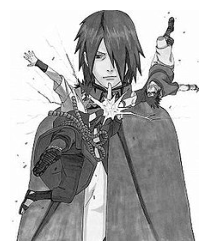

In [4]:
# dispaly gray image
plt.figure(figsize=(5,3))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

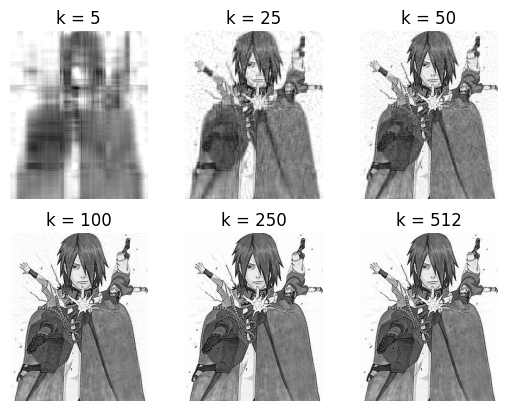

In [5]:
# decompose image using SVD
U, S, Vt = my_svd(img)

# reconstruct image with different level of compression
i = 1
for k in [5, 25, 50, 100, 250, 512]:
    img2 = np.dot(U[:, :k], np.dot(S[:k, :k], Vt[:k, :]))    # A = U * S * V.T
    # rescale to range [0, 255]
    img2 *= 255.0
    img2 = np.clip(img2, 0, 255).astype(np.uint8)

    plt.subplot(2, 3, i)
    i += 1
    plt.imshow(img2, cmap='gray')
    plt.title(f'k = {k}')
    plt.axis('off')
plt.show()

In [6]:
total_variance = np.sum(S**2) #Total sum of squared singular values
variance_ratios = []

for i in range(5, 512, 20):
    # Calculate the variance captured by the first i singular values
    captured_variance = np.sum(S[:i]**2)  # Sum of squared singular values
    variance_ratio = captured_variance / total_variance  # Proportion of total variance
    variance_ratios.append(variance_ratio)

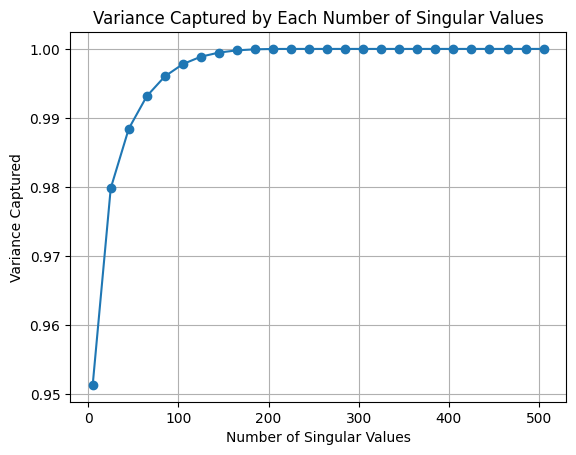

In [7]:
plt.plot(range(5, 512, 20), variance_ratios, marker='o')
plt.xlabel('Number of Singular Values')
plt.ylabel('Variance Captured')
plt.title('Variance Captured by Each Number of Singular Values')
plt.grid(True)
plt.show()

## Comparing with NumPy SVD

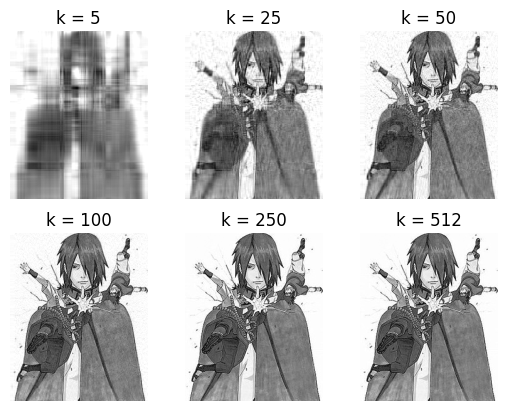

In [8]:
# decompose image using SVD
U1, Sigma, Vt1 = np.linalg.svd(img)
S1 = np.zeros((U1.shape[0],Vt1.shape[1]))
np.fill_diagonal(S1, Sigma)

# reconstruct image with different level of compression
i = 1
for k in [5, 25, 50, 100, 250, 512]:
    img3 = np.dot(U1[:, :k], np.dot(S1[:k, :k], Vt1[:k, :]))    # A = U * S * V.T
    # rescale to range [0, 255]
    img3 *= 255.0
    img3 = np.clip(img3, 0, 255).astype(np.uint8)

    plt.subplot(2, 3, i)
    i += 1
    plt.imshow(img3, cmap='gray')
    plt.title(f'k = {k}')
    plt.axis('off')
plt.show()

In [9]:
total_variance1 = np.sum(S1**2) #Total sum of squared singular values
variance_ratios1 = []

for i in range(5, 512, 20):
    # Calculate the variance captured by the first i singular values
    captured_variance1 = np.sum(S1[:i]**2)  # Sum of squared singular values
    variance_ratio1 = captured_variance1 / total_variance1  # Proportion of total variance
    variance_ratios1.append(variance_ratio1)

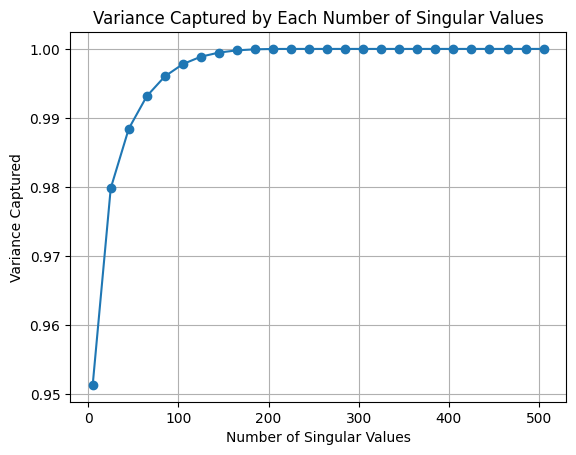

In [10]:
plt.plot(range(5, 512, 20), variance_ratios1, marker='o')
plt.xlabel('Number of Singular Values')
plt.ylabel('Variance Captured')
plt.title('Variance Captured by Each Number of Singular Values')
plt.grid(True)
plt.show()

## SVD on RGB Image

In [11]:
# load RGB image
rgb = cv2.imread('datasets/SasukeUchiha.jpg').astype(float)
rgb /= 255.0    # normalize in range [0, 1]
rgb.shape

(269, 220, 3)

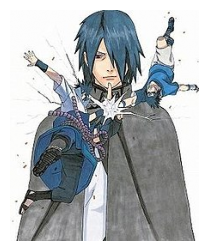

In [12]:
# display RGB image
plt.figure(figsize=(5,3))
plt.imshow(rgb[:,:,::-1])
plt.axis('off')
plt.show()

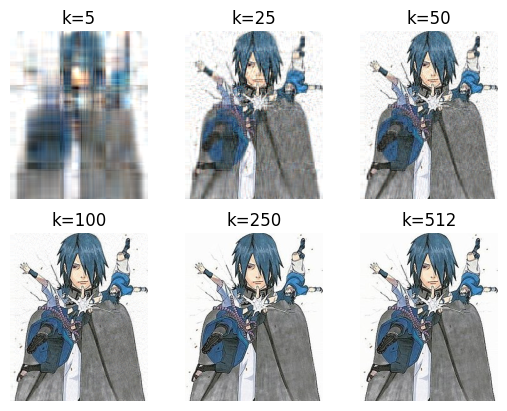

In [13]:
i = 1
for k in [5, 25, 50, 100, 250, 512]:    
    new_channels = []
    # apply SVD on each channel
    for channel in cv2.split(rgb):
        U2, S2, Vt2 = my_svd(channel)
        
        temp = np.dot(U2[:, :k], np.dot(S2[:k, :k], Vt2[:k, :]))    # top k singular values
        # rescale to range [0, 255]
        temp *= 255.0
        temp = np.clip(temp, 0, 255).astype(np.uint8)
        new_channels.append(temp)
    
    # merge the compressed channels back into an RGB image
    rgb2 = cv2.merge(new_channels)
    
    plt.subplot(2, 3, i)
    i += 1
    plt.imshow(rgb2[:,:,::-1])
    plt.title(f'k={k}')
    plt.axis('off')
plt.show()

In [14]:
total_variance2 = np.sum(S**2) #Total sum of squared singular values
variance_ratios2 = []

for i in range(5, 512, 20):
    # Calculate the variance captured by the first i singular values
    captured_variance2 = np.sum(S2[:i]**2)  # Sum of squared singular values
    variance_ratio2 = captured_variance2 / total_variance2  # Proportion of total variance
    variance_ratios2.append(variance_ratio2)

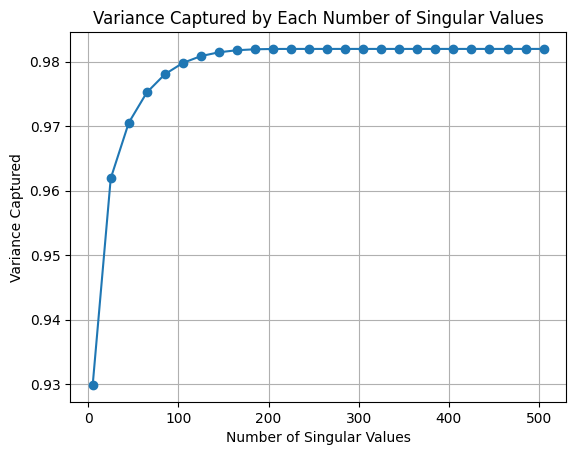

In [15]:
plt.plot(range(5, 512, 20), variance_ratios2, marker='o')
plt.xlabel('Number of Singular Values')
plt.ylabel('Variance Captured')
plt.title('Variance Captured by Each Number of Singular Values')
plt.grid(True)
plt.show()